In [1]:
import pandas as pd
from shapely.ops import polygonize
import matplotlib.pyplot as plt
import geopandas as gpd
import json

In [2]:
# Set up colors of zones
colors = {
    "Core Enchantment Zone": "gold",
    "Stuart Zone": "orange",
    "Colchuck Zone": "blue",
    "Snow Zone": "green",
    "Eightmile/Caroline Zone": "brown",
}
df_colors = pd.DataFrame.from_dict(colors, orient="index").reset_index()
df_colors.columns = ["id", "color"]
df_colors

,id,color
0,Core Enchantment Zone,gold
1,Stuart Zone,orange
2,Colchuck Zone,blue
3,Snow Zone,green
4,Eightmile/Caroline Zone,brown


In [3]:
# Read in the zones geojson
df_places = gpd.read_file("geojson/zones.geojson")
df_places = df_places.set_index("id").join(df_colors.set_index("id")).reset_index()
df_places

,id,name,ogr_osm_id,ogr_leisure,ogr_boundary,geometry,color
0,Stuart Zone,Stuart Zone,-7547211.0,nature_reserve,protected_area,"POLYGON ((-120.92028 47.49567, -120.92004 47.4...",orange
1,Eightmile/Caroline Zone,Eightmile/Caroline Zone,-7548763.0,nature_reserve,protected_area,"POLYGON ((-120.92788 47.51408, -120.92776 47.5...",brown
2,Colchuck Zone,Colchuck Zone,-7547207.0,nature_reserve,protected_area,"POLYGON ((-120.84932 47.49199, -120.84793 47.4...",blue
3,Core Enchantment Zone,Core Enchantment Zone,-7547258.0,nature_reserve,protected_area,"POLYGON ((-120.83706 47.47522, -120.83579 47.4...",gold
4,Snow Zone,Snow Zone,-7547259.0,nature_reserve,protected_area,"POLYGON ((-120.76900 47.48106, -120.76853 47.4...",green


In [4]:
# Read in river data
df_rivers = gpd.read_file("geojson/rivers.geojson")
df_rivers

,name,geometry
0,None,"LINESTRING (-120.89730 47.46908, -120.89702 47..."
1,None,"LINESTRING (-120.88100 47.46659, -120.88100 47..."
2,None,"LINESTRING (-120.86114 47.46838, -120.86240 47..."
3,None,"LINESTRING (-120.82976 47.46818, -120.83196 47..."
4,Crystal Creek,"LINESTRING (-120.80078 47.47391, -120.80074 47..."
...,...,...
123,None,"LINESTRING (-120.70214 47.54497, -120.70175 47..."
124,None,"LINESTRING (-120.70130 47.54508, -120.70105 47..."
125,Icicle Creek,"LINESTRING (-120.81938 47.59952, -120.81913 47..."
126,None,"LINESTRING (-120.72472 47.56518, -120.72375 47..."


In [5]:
# Read in lake data
df_lakes = gpd.read_file("geojson/lakes.geojson")
df_lakes["geometry"] = gpd.GeoSeries(polygonize(df_lakes["geometry"]))

df_lakes

,name,geometry
0,Jack Lake,"POLYGON ((-120.91305 47.49254, -120.91300 47.4..."
1,Horseshoe Lake,"POLYGON ((-120.90985 47.49343, -120.90984 47.4..."
2,Lake Stuart,"POLYGON ((-120.88158 47.49480, -120.88157 47.4..."
3,None,"POLYGON ((-120.93079 47.53347, -120.93078 47.5..."
4,None,"POLYGON ((-120.92771 47.53335, -120.92769 47.5..."
...,...,...
64,None,"POLYGON ((-120.79375 47.49295, -120.79373 47.4..."
65,Nada Lake,"POLYGON ((-120.78049 47.48421, -120.78047 47.4..."
66,None,"POLYGON ((-120.78340 47.49611, -120.78337 47.4..."
67,Toketie Lake,"POLYGON ((-120.77540 47.50228, -120.77539 47.5..."


In [6]:
# Read in river data
df_trails = gpd.read_file("geojson/trails.geojson")
df_trails

,name,geometry
0,None,"LINESTRING (-120.92781 47.47614, -120.92794 47..."
1,None,"LINESTRING (-120.92781 47.47614, -120.92737 47..."
2,None,"LINESTRING (-120.90485 47.45905, -120.90484 47..."
3,None,"LINESTRING (-120.89672 47.45444, -120.89662 47..."
4,None,"LINESTRING (-120.89762 47.47149, -120.89738 47..."
...,...,...
173,None,"LINESTRING (-120.69964 47.54539, -120.69933 47..."
174,None,"LINESTRING (-120.69929 47.54495, -120.69935 47..."
175,None,"LINESTRING (-120.69933 47.54498, -120.69929 47..."
176,Icicle Road,"LINESTRING (-120.71060 47.54454, -120.71076 47..."


<Figure size 432x288 with 0 Axes>

<Figure size 7200x4800 with 0 Axes>

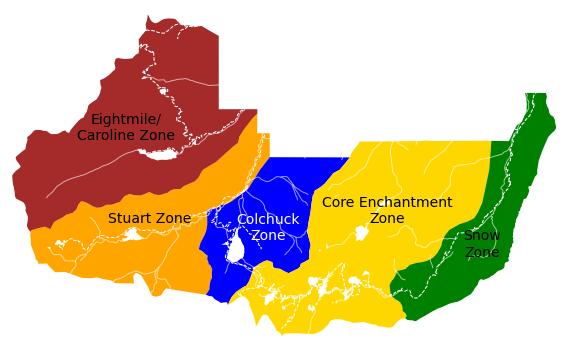

In [44]:
# Set up figure
plt.clf()
plt.figure(dpi=1200, facecolor="white")
fig, ax = plt.subplots(1, figsize=(10, 10))
fig.patch.set_facecolor("white")

# Plot data
ax = df_places.plot(color=df_places["color"], ax=ax)
ax = df_rivers.plot(color="white", linewidth= 1, alpha=0.6, ax=ax)
ax = df_trails.plot(color="white", linestyle="dashed", linewidth= 1, ax=ax)
ax = df_lakes.plot(color="white", ax=ax)
ax.set_xlim([-120.93, -120.695])
ax.set_ylim([47.462, 47.565])
ax.set_aspect(1.4)

# Add labels
plt.text(-120.88, 47.525, "Eightmile/\nCaroline Zone", fontsize=14, ha="center")
plt.text(-120.87, 47.5, "Stuart Zone", fontsize=14, ha="center")
plt.text(-120.82, 47.495, "Colchuck\nZone", color="white", fontsize=14, ha="center")
plt.text(-120.77, 47.5, "Core Enchantment\nZone", fontsize=14, ha="center")
plt.text(-120.73, 47.49, "Snow\nZone", fontsize=14, ha="center")

# Axes
ax.axis("off")
ax.set_xticks([])
ax.set_yticks([])

plt.savefig("map_prototype.png", bbox_inches="tight", transparent=False, pad_inches=0.5)